<a href="https://colab.research.google.com/github/digitalopentech/mvppucsaude/blob/main/MVP_PUC_LeonardoNunes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Com base na análise exploratória e pré-processamento de dados realizados, o problema a ser resolvido é a classificação de doenças cardíacas com base em uma série de atributos clínicos dos pacientes. Este é um problema de aprendizado supervisionado, onde os dados de entrada são os atributos clínicos dos pacientes e a variável alvo é a presença ou não de doença cardíaca.

Uma das premissas do problema é que os atributos clínicos dos pacientes podem ser usados para prever a presença de doenças cardíacas com uma certa precisão. Também é possível que alguns atributos tenham uma influência mais forte na previsão do que outros.

Não foram impostas restrições ou condições específicas para selecionar os dados, mas é importante notar que o conjunto de dados é relativamente pequeno, com apenas 303 instâncias. Isso pode limitar a precisão dos modelos de previsão.

A seguir, estão os atributos do dataset:

1. Age: Idade do paciente em anos
2. Sex: Gênero do paciente (0 = feminino, 1 = masculino)
3. CP: Tipo de dor torácica (0 = típica angina, 1 = angina atípica, 2 = dor não anginosa, 3 = assintomático)
4. Trestbps: Pressão arterial em repouso (mm Hg)
5. Chol: Colesterol sérico em mg/dl
6. Fbs: Nível de açúcar no sangue em jejum > 120 mg/dl (0 = falso, 1 = verdadeiro)
7. Restecg: Resultados do eletrocardiograma em repouso (0 = normal, 1 = anormalidades de ST-T, 2 = hipertrofia ventricular esquerda provável ou definitiva)
8. Thalach: Frequência cardíaca máxima alcançada durante o teste de estresse
9. Exang: Angina induzida pelo exercício (0 = não, 1 = sim)
10. Oldpeak: Depressão do segmento ST induzida pelo exercício em relação ao repouso
11. Slope: A inclinação do segmento ST durante o pico do exercício (0 = inclinação ascendente, 1 = plano, 2 = inclinação descendente)
12. Ca: Número de vasos principais coloridos por flourosopria
13. Thal: Defeito de talassemia (3 = normal, 6 = defeito corrigido, 7 = defeito reversível)

Análise Exploratória de Dados
Importando as Bibliotecas Necessárias
Para iniciar a análise exploratória, precisamos importar as bibliotecas necessárias:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Carregando os Dados
Em seguida, os dados do arquivo CSV foram carregados usando a biblioteca pandas:

In [ ]:
url = 'https://raw.githubusercontent.com/digitalopentech/mvppucsaude/main/heart.csv'
df = pd.read_csv(url)


Primeiros registros do conjunto de dados

In [ ]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Verificar o tamanho do conjunto de dados 

Podemos ver que o conjunto de dados contém 14 colunas, incluindo a variável alvo "target". 

In [ ]:
print("Número de instâncias: ", df.shape[0])
print("Número de atributos: ", df.shape[1])


Número de instâncias:  1025
Número de atributos:  14


Tipos de dados dos atributos do conjunto de dados, podemos usar o método info() do pandas.

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [ ]:
df.shape


(1025, 14)

Descrição da Estatística dos Dados

In [ ]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Verificando a Existência de Dados Nulos

In [ ]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Visualização dos Dados
Histograma da idade dos pacientes:

<Axes: xlabel='age', ylabel='Count'>

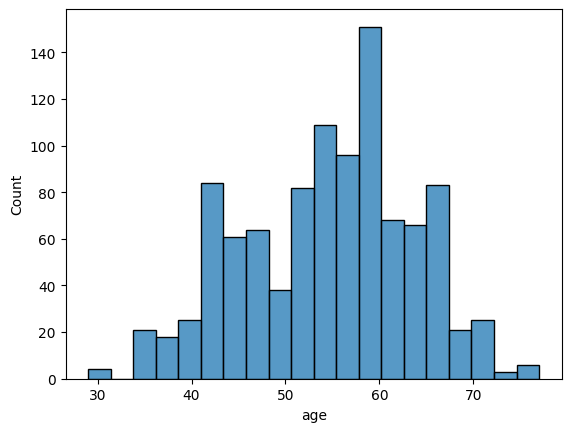

In [ ]:
sns.histplot(data=df, x='age', bins=20)


Gráfico de barras para visualizar a contagem de pacientes por sexo:

<Axes: xlabel='sex', ylabel='count'>

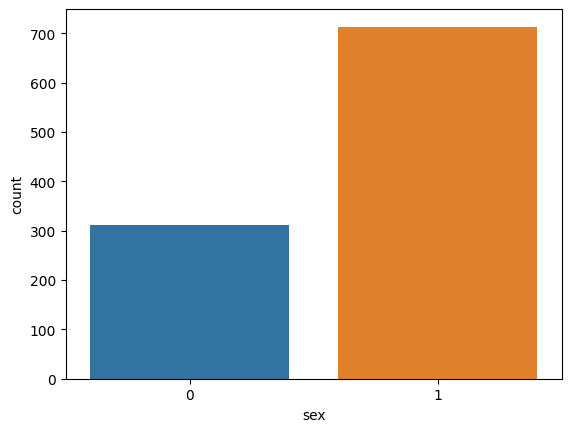

In [ ]:
sns.countplot(data=df, x='sex')


Gráfico de dispersão para visualizar a relação entre idade e colesterol:

<Axes: xlabel='age', ylabel='chol'>

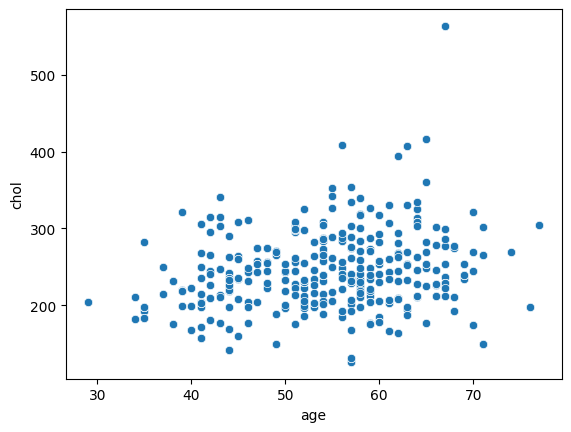

In [ ]:
sns.scatterplot(data=df, x='age', y='chol')


Gráfico de barras empilhadas para visualizar a contagem de pacientes com diferentes tipos de dor no peito, agrupados por sexo:

<Axes: xlabel='cp', ylabel='count'>

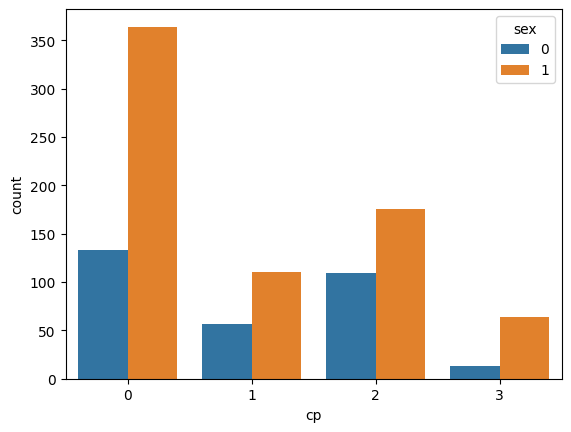

In [ ]:
sns.countplot(data=df, x='cp', hue='sex')


Gráfico de caixa para visualizar a distribuição da pressão sanguínea em pacientes com diferentes tipos de dor no peito:

<Axes: xlabel='cp', ylabel='trestbps'>

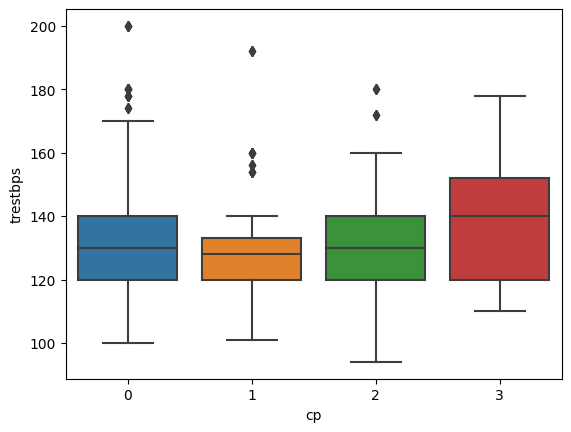

In [ ]:
sns.boxplot(data=df, x='cp', y='trestbps')


Gráfico de dispersão para visualizar a relação entre idade e frequência cardíaca máxima alcançada:

<Axes: xlabel='age', ylabel='thalach'>

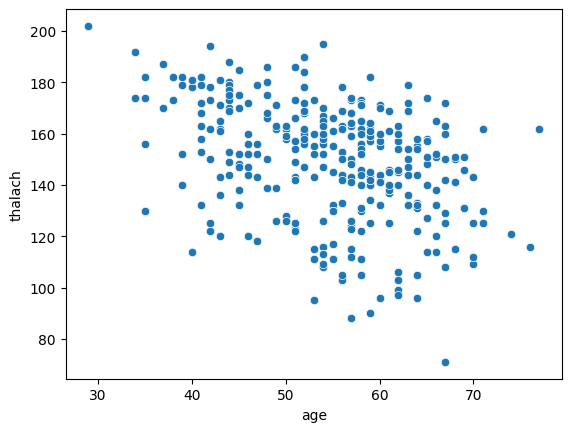

In [ ]:
sns.scatterplot(data=df, x='age', y='thalach')


Gráfico de barras empilhadas para visualizar a contagem de pacientes com diferentes tipos de dor no peito, agrupados por presença ou ausência de doença cardíaca:

<Axes: xlabel='cp', ylabel='count'>

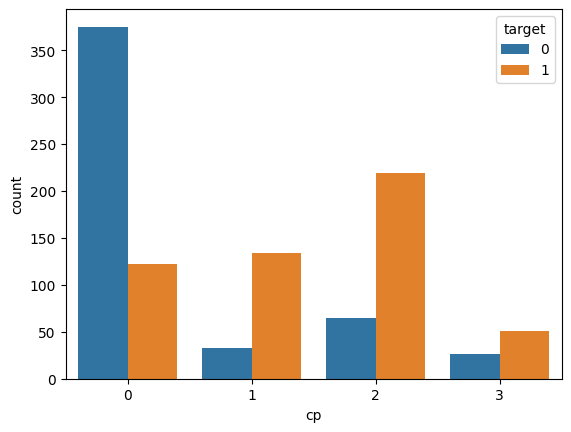

In [ ]:
sns.countplot(data=df, x='cp', hue='target')


**Pré-processamento de Dados**

Tratamento de Dados Faltantes
Verificar se existem valores ausentes no conjunto de dados:

In [ ]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Neste caso, não foram encontrados valores ausentes no conjunto de dados.

Tratamento de Outliers
Verificando a presença de outliers no conjunto de dados por meio de gráficos de boxplot, como foi feito na análise exploratória.

Caso haja outliers, removê-los ou tratá-los por meio de técnicas de imputação, dependendo do impacto que eles possam ter na modelagem.

Codificação de Variáveis Categóricas
Algumas variáveis no conjunto de dados são categóricas, como "sex", "cp" e "thal". É necessário convertê-las em variáveis numéricas para a modelagem.

Uutilizar a técnica de codificação one-hot encoding para converter essas variáveis em variáveis binárias.

In [ ]:
df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'thal'])


Normalização de Variáveis
Algumas variáveis no conjunto de dados estão em escalas diferentes. Podemos normalizar as variáveis para colocá-las na mesma escala.

Podemos utilizar a técnica de normalização min-max para normalizar as variáveis:

Padronização usando StandardScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_encoded)


Normalização dos dados usando o método MinMaxScaler do sklearn. A normalização é uma técnica de pré-processamento que visa deixar todos os valores em uma escala entre 0 e 1, de forma que não haja grandes discrepâncias entre os valores dos diferentes atributos.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_encoded)


Discretização usando KBinsDiscretizer:

Padronização dos dados usando o método StandardScaler do sklearn. A padronização é outra técnica de pré-processamento que visa transformar os valores dos atributos para que tenham média zero e desvio padrão igual a um. Isso é útil para casos em que os valores dos atributos não seguem uma distribuição normal.

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df_discretized = discretizer.fit_transform(df_encoded)


Discretização dos dados usando o método KBinsDiscretizer do sklearn. A discretização é uma técnica de pré-processamento que transforma os valores contínuos dos atributos em valores discretos.

One-hot encoding usando OneHotEncoder:

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
df_onehot = encoder.fit_transform(df_encoded)
